In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score

* Import data frame
* label columns with 'labal' ' sms_message'
* display first 5 columns

In [2]:
df = pd.read_table('SMSSpamCollection', sep='\t', names = ['label', 'sms_message'])
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Instructions:

* Convert the values in the 'label' column to numerical values using map method as follows: {'ham':0, 'spam':1} This maps the 'ham' value to 0 and the 'spam' value to 1.
* Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 'shape'.

In [3]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})

In [4]:
df.shape

(5572, 2)

In [5]:
count_vector = CountVectorizer()

In [4]:
# split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],
                                                   df['label'],
                                                   random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [6]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [7]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
predictions = naive_bayes.predict(testing_data)

In [9]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


In [18]:
# Instantiate a BaggingClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
bagging = BaggingClassifier(n_estimators=200)


# Instantiate a RandomForestClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
random_forest = RandomForestClassifier(n_estimators=200)

# Instantiate an a AdaBoostClassifier with:
# With 300 weak learners (n_estimators) and a learning_rate of 0.2
ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

# Instantiate an a SVC
svm_mod = SVC()

In [19]:
# Fit your BaggingClassifier to the training data
bagging.fit(training_data, y_train)

# Fit your RandomForestClassifier to the training data
random_forest.fit(training_data, y_train)

# Fit your AdaBoostClassifier to the training data
ada.fit(training_data, y_train)

# fit the SVC to the training data
svm_mod.fit(training_data, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# Predict using BaggingClassifier on the test data
bag = bagging.predict(testing_data)

# Predict using RandomForestClassifier on the test data
rf = random_forest.predict(testing_data)

# Predict using AdaBoostClassifier on the test data
adab = ada.predict(testing_data)

# Predict using SVC on the test data
svm = svm_mod.predict(testing_data)

In [13]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [55]:
# Print Bagging scores
print_metrics(y_test, bag, "Bagging")

# Print Random Forest scores
print_metrics(y_test, rf, "RandomForest")

# Print AdaBoost scores
print_metrics(y_test, adab, "AdaBoost")

# Naive Bayes Classifier scores
print_metrics(y_test, predictions, "NaiveBayes")

# SVM Classifier scores
print_metrics(y_test, svm, "svm")

Accuracy score for Bagging : 0.9741564967695621
Precision score Bagging : 0.9116022099447514
Recall score Bagging : 0.8918918918918919
F1 score Bagging : 0.9016393442622951



Accuracy score for RandomForest : 0.9813352476669059
Precision score RandomForest : 1.0
Recall score RandomForest : 0.8594594594594595
F1 score RandomForest : 0.9244186046511628



Accuracy score for AdaBoost : 0.9770279971284996
Precision score AdaBoost : 0.9693251533742331
Recall score AdaBoost : 0.8540540540540541
F1 score AdaBoost : 0.9080459770114943



Accuracy score for NaiveBayes : 0.9885139985642498
Precision score NaiveBayes : 0.9720670391061452
Recall score NaiveBayes : 0.9405405405405406
F1 score NaiveBayes : 0.9560439560439562



Accuracy score for svm : 0.8671931083991385
Precision score svm : 0.0
Recall score svm : 0.0
F1 score svm : 0.0





/home/gruglife/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gruglife/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT
    returns the accuracy as a float
    '''
    
    return np.sum(preds == actual)/len(actual)

print(accuracy(y_test, predictions))
print(accuracy_score(y_test, predictions))
print("Since the scores match, I correctly calculated the metric!")

0.9885139985642498
0.9885139985642498
Since the scores match, I correctly calculated the metric!


In [47]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 0 and negative = 1)
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT
    returns the presicion as a float
    '''
    
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/(pred_pos)

print(precision(y_test, predictions))
print(precision_score(y_test, predictions))
print('If the above match, I got it correct')

0.9720670391061452
0.9720670391061452
If the above match, I got it correct


In [49]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT 
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT
    returns the recall as a float
    '''
    
    tp = len(np.intersect1d(np.where(preds == 1), np.where(actual==1)))
    act_pos = (actual == 1).sum()
    return tp/act_pos

print(recall(y_test, predictions))
print(recall_score(y_test, predictions))
print('If the above match, I got it correct')

0.9405405405405406
0.9405405405405406
If the above match, I got it correct


In [53]:
# f1_score is 2*(precision*recall)/(precision+recall)
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT
    returns the f1score as a float
    '''
    
    tp = len(np.intersect1d(np.where(preds == 1), np.where(actual == 1)))
    pred_pos = (preds==1).sum()
    prec = tp/(pred_pos)
    act_pos = (actual==1).sum()
    recall = tp/(act_pos)
    return 2*(prec*recall)/(prec+recall)

print(f1(y_test, predictions))
print(f1_score(y_test, predictions))
print('If the above match, I got it correct')

0.9560439560439562
0.9560439560439562
If the above match, I got it correct


In [58]:
# now using skearns fbeta_score to get the same results as above
fbeta_score(y_test, predictions, beta=1)

0.9560439560439562

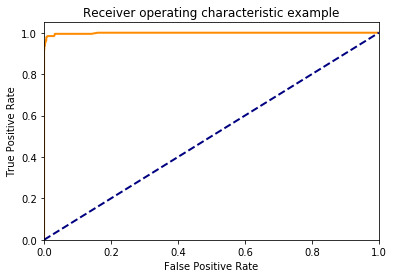

0.9351351351351351

In [62]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(random_forest, training_data, testing_data, y_train, y_test) 

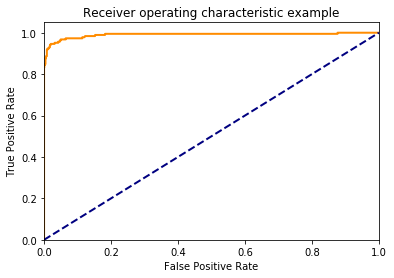

0.9249574906031861

In [64]:
# My turn here - choose another classifier to see how it compares
build_roc_auc(ada, training_data, testing_data, y_train, y_test) 